In [2]:
from google.colab import files
iris=files.upload()

Saving iris (2).csv to iris (2).csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
df1=pd.read_csv("iris (2).csv")
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df1.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Accuracy for k=1: 1.0, Error Rate for k=1: 0.0
Accuracy for k=2: 1.0, Error Rate for k=2: 0.0
Accuracy for k=3: 1.0, Error Rate for k=3: 0.0
Accuracy for k=4: 1.0, Error Rate for k=4: 0.0
Accuracy for k=5: 1.0, Error Rate for k=5: 0.0
Accuracy for k=6: 1.0, Error Rate for k=6: 0.0
Accuracy for k=7: 0.9666666666666667, Error Rate for k=7: 0.033333333333333326
Accuracy for k=8: 1.0, Error Rate for k=8: 0.0
Accuracy for k=9: 1.0, Error Rate for k=9: 0.0
Accuracy for k=10: 1.0, Error Rate for k=10: 0.0
Best k value: 1
Accuracy Score: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


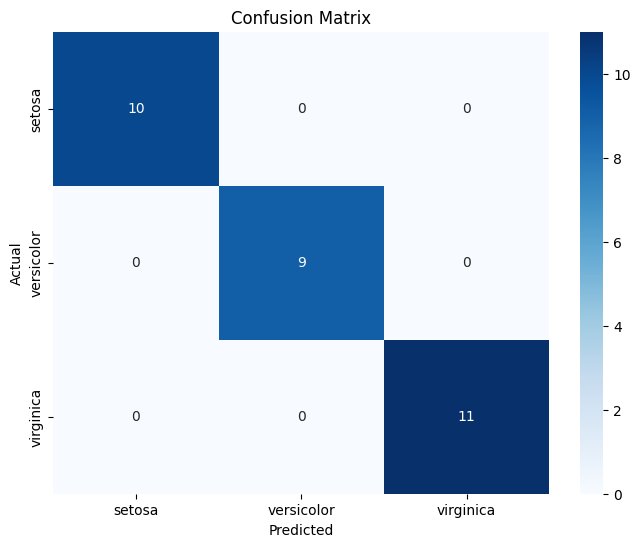

In [40]:
X = df1.drop('species', axis=1)
y = df1['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_k = 1
best_accuracy = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}, Error Rate for k={k}: {1-accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
diabetes=files.upload()

Saving diabetes.csv to diabetes.csv


In [20]:
df2=pd.read_csv("diabetes.csv")
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df2.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Accuracy for k=1: 0.6168831168831169
Accuracy for k=2: 0.6558441558441559
Accuracy for k=3: 0.7012987012987013
Accuracy for k=4: 0.6948051948051948
Accuracy for k=5: 0.6883116883116883
Accuracy for k=6: 0.7012987012987013
Accuracy for k=7: 0.6818181818181818
Accuracy for k=8: 0.6883116883116883
Accuracy for k=9: 0.6818181818181818
Accuracy for k=10: 0.6818181818181818
Best k value: 3
Accuracy: 0.7012987012987013
Confusion Matrix:
[[80 19]
 [27 28]]


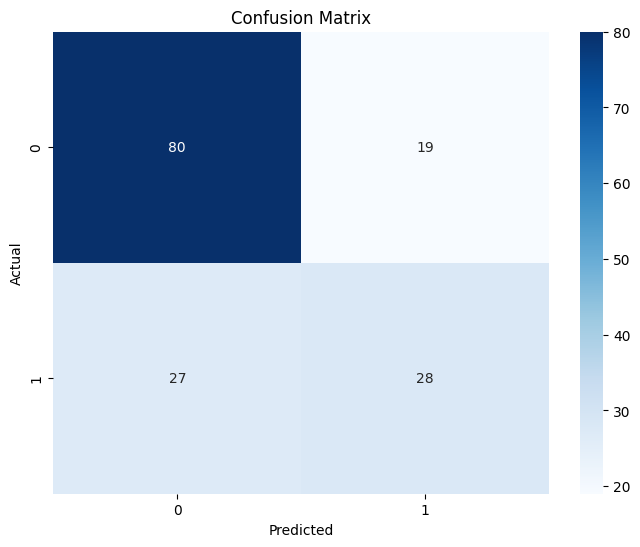


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        99
           1       0.60      0.51      0.55        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2.drop('Outcome', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df2['Outcome'], test_size=0.2, random_state=42)

best_k = 1
best_accuracy = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [24]:
heart=files.upload()

Saving heart.csv to heart.csv


In [26]:
df3=pd.read_csv("heart.csv")
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df3.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Accuracy for k=1: 0.6229508196721312, Error Rate for k=1: 0.3770491803278688
Accuracy for k=2: 0.639344262295082, Error Rate for k=2: 0.360655737704918
Accuracy for k=3: 0.6557377049180327, Error Rate for k=3: 0.34426229508196726
Accuracy for k=4: 0.6721311475409836, Error Rate for k=4: 0.3278688524590164
Accuracy for k=5: 0.6885245901639344, Error Rate for k=5: 0.3114754098360656
Accuracy for k=6: 0.7213114754098361, Error Rate for k=6: 0.2786885245901639
Accuracy for k=7: 0.7049180327868853, Error Rate for k=7: 0.29508196721311475
Accuracy for k=8: 0.6885245901639344, Error Rate for k=8: 0.3114754098360656
Accuracy for k=9: 0.6885245901639344, Error Rate for k=9: 0.3114754098360656
Accuracy for k=10: 0.7049180327868853, Error Rate for k=10: 0.29508196721311475
Best k value: 6
Accuracy Score: 0.7540983606557377

Confusion Matrix:
[[20  9]
 [ 6 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
     

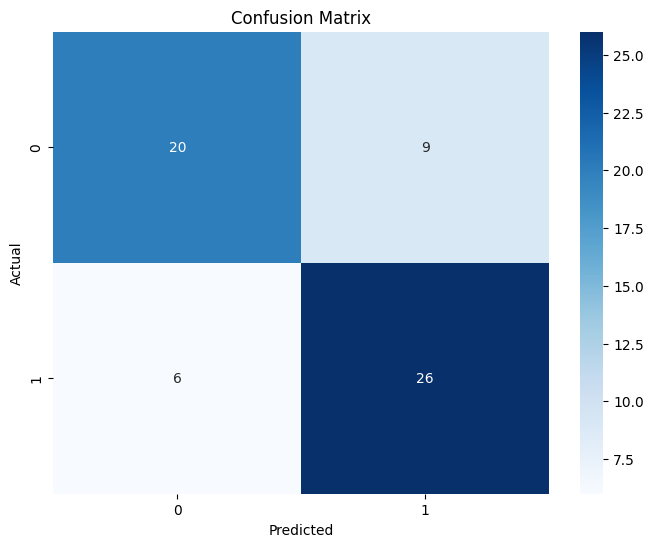

In [46]:
X = df3.drop('target', axis=1)
y = df3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_k = 1
best_accuracy = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}, Error Rate for k={k}: {1-accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")


knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
